# Project 3: Computer Vision
##### Satjyot Atwal
##### Hung Quach
##### Zining Yang

## Imports and Functions

In [4]:
# Use TensorFlow version 2
%tensorflow_version 2.x 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from google.colab import drive

import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
        
from sklearn import metrics
from sklearn import preprocessing

# Google Drive is mounted to /content/gdrive/My Drive/
save_path = "/content/gdrive/My Drive/Saved_NN/"


def cm_visual(y_true, pred, outcome):
    cm = metrics.confusion_matrix(y_true, pred)
    print(cm)

    plt.figure(figsize=(8, 8))
    plot_confusion_matrix(cm, outcome)
    plt.show()

    print(metrics.classification_report(y_true, pred))


# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

UsageError: Line magic function `%tensorflow_version` not found.


## Verify I am using Tensorflow Version 2

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, termcolor, google-pasta, gast, keras-applications, tensorflow-estimator, grpcio, wrapt, astor, keras-preprocessing, opt-einsum, wheel, scipy, six, absl-py, protobuf, tensorboard
Required-by: tensorflow-federated, fancyimpute


## Verify Notebook is using GPU

In [2]:
tf.test.gpu_device_name()

NameError: name 'tf' is not defined

## Connect My Google Drive to Google Colab

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Load CIFAR Dataset

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'cifar10' is not defined

In [ ]:
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

uint8
uint8
uint8
int64


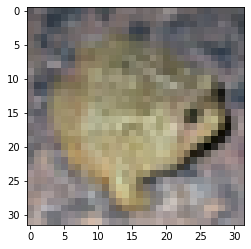

In [ ]:
plt.imshow(x_test[2802])

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
x_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

## Datapreprocessing

##### Upsampling the input images to 64 by 64 pixels

In [ ]:
x_train = tf.image.resize(x_train, (64, 64))
x_test = tf.image.resize(x_test, (64, 64))
print(x_train.shape)
print(x_test.shape)
type(x_train)
type(x_test)

(50000, 64, 64, 3)
(10000, 64, 64, 3)


tensorflow.python.framework.ops.EagerTensor

In [ ]:
x_train = x_train.numpy()
x_test = x_test.numpy()
print(type(x_train))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


##### Convert to float32 for normalization

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

##### Normalize the data values to the range [0, 1]

In [ ]:
x_train /= 255
x_test /= 255
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.21568628, 0.22745098, 0.22941177],
         [0.18431373, 0.19607843, 0.19411765],
         ...,
         [0.5921569 , 0.48921567, 0.40098038],
         [0.58431375, 0.4872549 , 0.40294117],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.18921569, 0.20196079, 0.20490196],
         [0.17352942, 0.18529412, 0.1867647 ],
         [0.14215687, 0.15196079, 0.1504902 ],
         ...,
         [0.5615196 , 0.4492647 , 0.3514706 ],
         [0.55710787, 0.4497549 , 0.35637254],
         [0.55490196, 0.45      , 0.35882354]],

        [[0.10490196, 0.11960784, 0.12058824],
         [0.08921569, 0.10098039, 0.10147059],
         [0.05784314, 0.06372549, 0.0632353 ],
         ...,
         [0.5002451 , 0.36936274, 0.25245097],
         [0.5026961 , 0.3747549 , 0.2632353 ],
         [0.50392157, 0.37745097, 0.26862746]],

        ...,

        [[0.7029412 , 0.55      , 0.39607844],
         [0.69558823, 0.53455883, 0.3509804 ]

In [ ]:
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62058824, 0.43823528, 0.19019608],
         [0.622549  , 0.4362745 , 0.18627451],
         ...,
         [0.48431373, 0.3509804 , 0.1382353 ],
         [0.46470588, 0.3392157 , 0.13235295],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.6137255 , 0.4392157 , 0.19411765],
         [0.6142157 , 0.4379902 , 0.18995099],
         [0.61519605, 0.43553922, 0.18161765],
         ...,
         [0.48431373, 0.35171568, 0.13553922],
         [0.46666667, 0.34142157, 0.13210784],
         [0.45784312, 0.3362745 , 0.13039216]],

        [[0.6019608 , 0.4392157 , 0.19803922],
         [0.6014706 , 0.4375    , 0.18946078],
         [0.6004902 , 0.43406862, 0.17230392],
         ...,
         [0.48431373, 0.35318628, 0.13014705],
         [0.47058824, 0.34583333, 0.13161765],
         [0.46372548, 0.34215686, 0.13235295]],

        ...,

        [[0.23235294, 0.44607842, 0.6509804 ],
         [0.2240196 , 0.43529412, 0.6335784 ]

##### One-hot encode output column (image categories)

In [ ]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(input_shape)

print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

(50000, 64, 64, 3)
(10000, 64, 64, 3)
(50000, 10)
(10000, 10)
(64, 64, 3)
float32
float32
float32
float32


## CNN without Transfer Learning

In [ ]:
# Save best model with best weights
checkpointer = ModelCheckpoint(filepath=os.path.join(save_path, "cnn_no_tl.hdf5"), 
                               verbose=0, save_best_only=True)

# Run model training two times to jump out of local optimum 
for i in range(2):
    print('\nRun: ', i + 1)
    
    cnn_no_tl = Sequential()
    
    cnn_no_tl.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
    cnn_no_tl.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    cnn_no_tl.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    cnn_no_tl.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    cnn_no_tl.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    cnn_no_tl.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    cnn_no_tl.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    cnn_no_tl.add(Flatten())
    cnn_no_tl.add(Dense(512, activation='relu'))
    cnn_no_tl.add(Dropout(0.5))
    cnn_no_tl.add(Dense(y_train.shape[1], activation='softmax'))

    # Use categorical crossentropy loss since it is a classification problem
    cnn_no_tl.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, decay=1e-6))

    # Stop training when model stops improving
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')

    cnn_no_tl.fit(x_train, y_train, validation_data=(x_test, y_test), 
                   callbacks=[monitor, checkpointer], verbose=2, epochs=1000, batch_size=128)


Run:  1
Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 - 17s - loss: 1.5731 - val_loss: 1.2638
Epoch 2/1000
50000/50000 - 9s - loss: 1.1498 - val_loss: 0.9909
Epoch 3/1000
50000/50000 - 9s - loss: 0.9441 - val_loss: 0.8908
Epoch 4/1000
50000/50000 - 8s - loss: 0.8082 - val_loss: 0.8297
Epoch 5/1000
50000/50000 - 9s - loss: 0.6971 - val_loss: 0.8046
Epoch 6/1000
50000/50000 - 8s - loss: 0.5806 - val_loss: 0.8392
Epoch 7/1000
50000/50000 - 8s - loss: 0.4980 - val_loss: 0.8181
Epoch 8/1000
50000/50000 - 8s - loss: 0.4215 - val_loss: 0.8919
Epoch 00008: early stopping

Run:  2
Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 - 9s - loss: 1.5125 - val_loss: 1.1696
Epoch 2/1000
50000/50000 - 8s - loss: 1.1039 - val_loss: 0.9661
Epoch 3/1000
50000/50000 - 8s - loss: 0.9116 - val_loss: 0.9078
Epoch 4/1000
50000/50000 - 8s - loss: 0.7718 - val_loss: 0.8732
Epoch 5/1000
50000/50000 - 8s - loss: 0.6596 - val_loss: 0.8452
Epoch 6/1000
50000/50

## CNN with Transfer Learning

##### Load pre_trained VGG16 model

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
vgg_model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
______________________________________________________________

##### Train my own CNN model on top of pre-trained model

In [ ]:
# Save best model with best weights
checkpointer = ModelCheckpoint(filepath=os.path.join(save_path, "cnn_tl.hdf5"), 
                               verbose=0, save_best_only=True)

# Run model training two times to jump out of local optimum 
for i in range(2):
    print('\nRun: ', i + 1)
    
    # Apply layers of VGG16 model to cnn_tl
    cnn_tl = Sequential()

    for layer in vgg_model.layers:
      cnn_tl.add(layer)

    # Fix weights of the pre-trained model
    for layer in cnn_tl.layers:
      layer.trainable = False

    cnn_tl.add(Flatten())
    cnn_tl.add(Dense(512, activation='relu'))
    cnn_tl.add(Dropout(0.5))
    cnn_tl.add(Dense(y_train.shape[1], activation='softmax'))

    # Use categorical crossentropy loss since it is a classification problem
    cnn_tl.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, decay=1e-6))

    # Stop training when model stops improving
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')

    cnn_tl.fit(x_train, y_train, validation_data=(x_test, y_test), 
                   callbacks=[monitor, checkpointer], verbose=2, epochs=1000, batch_size=128)


Run:  1
Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 - 16s - loss: 1.2586 - val_loss: 1.0095
Epoch 2/1000
50000/50000 - 14s - loss: 1.0188 - val_loss: 0.9420
Epoch 3/1000
50000/50000 - 14s - loss: 0.9504 - val_loss: 0.9116
Epoch 4/1000
50000/50000 - 14s - loss: 0.9059 - val_loss: 0.8832
Epoch 5/1000
50000/50000 - 14s - loss: 0.8678 - val_loss: 0.8684
Epoch 6/1000
50000/50000 - 14s - loss: 0.8389 - val_loss: 0.8518
Epoch 7/1000
50000/50000 - 13s - loss: 0.8124 - val_loss: 0.8709
Epoch 8/1000
50000/50000 - 13s - loss: 0.7827 - val_loss: 0.8548
Epoch 9/1000
50000/50000 - 13s - loss: 0.7645 - val_loss: 0.8634
Epoch 00009: early stopping

Run:  2
Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 - 14s - loss: 1.2565 - val_loss: 1.0023
Epoch 2/1000
50000/50000 - 13s - loss: 1.0173 - val_loss: 0.9446
Epoch 3/1000
50000/50000 - 13s - loss: 0.9518 - val_loss: 0.9227
Epoch 4/1000
50000/50000 - 13s - loss: 0.9033 - val_loss: 0.8896
Epoch 5/1

## Load neural networks from each saved hdf5 file

In [ ]:
saved_cnn_no_tl = load_model(os.path.join(save_path, "cnn_no_tl.hdf5"))

saved_cnn_tl = load_model(os.path.join(save_path, "cnn_tl.hdf5"))

##### No Transfer Learning CNN Model Summary

In [ ]:
saved_cnn_no_tl.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)            

##### Transfer Learning CNN Model Summary

In [ ]:
saved_cnn_tl.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 16, 16, 256)      

## Model Evaluations¶
#### Accuracy, Precision, Recall and F1 scores of each model

##### NO Transfer Learning CNN model

In [ ]:
y_true = np.argmax(y_test, axis=1) 

cnn_no_tl_pred = saved_cnn_no_tl.predict(x_test)
cnn_no_tl_pred = np.argmax(cnn_no_tl_pred, axis=1) # raw probabilities to choose class (highest probability)

cnn_no_tl_acc = metrics.accuracy_score(y_true, cnn_no_tl_pred)
print("NO Transfer Learning CNN Accuracy score: {}".format(cnn_no_tl_acc))
cnn_no_tl_prec = metrics.precision_score(y_true, cnn_no_tl_pred, average= "weighted")
print("NO Transfer Learning CNN Precision score: {}".format(cnn_no_tl_prec))
cnn_no_tl_rec = metrics.recall_score(y_true, cnn_no_tl_pred, average= "weighted")
print("NO Transfer Learning CNN Recall score: {}".format(cnn_no_tl_rec))
cnn_no_tl_score = metrics.f1_score(y_true, cnn_no_tl_pred, average= "weighted")
print("NO Transfer Learning CNN F1 score: {}".format(cnn_no_tl_score))

NO Transfer Learning CNN Accuracy score: 0.7316
NO Transfer Learning CNN Precision score: 0.7325610653934176
NO Transfer Learning CNN Recall score: 0.7316
NO Transfer Learning CNN F1 score: 0.7297457016889314


##### Transfer Learning CNN model

In [ ]:
cnn_tl_pred = saved_cnn_tl.predict(x_test)
cnn_tl_pred = np.argmax(cnn_tl_pred, axis=1) # raw probabilities to choose class (highest probability)

cnn_tl_acc = metrics.accuracy_score(y_true, cnn_tl_pred)
print("Transfer Learning CNN Accuracy score: {}".format(cnn_tl_acc))
cnn_tl_prec = metrics.precision_score(y_true, cnn_tl_pred, average= "weighted")
print("Transfer Learning CNN Precision score: {}".format(cnn_tl_prec))
cnn_tl_rec = metrics.recall_score(y_true, cnn_tl_pred, average= "weighted")
print("Transfer Learning CNN Recall score: {}".format(cnn_tl_rec))
cnn_tl_score = metrics.f1_score(y_true, cnn_tl_pred, average= "weighted")
print("Transfer Learning CNN F1 score: {}".format(cnn_tl_score))

Transfer Learning CNN Accuracy score: 0.7142
Transfer Learning CNN Precision score: 0.7129620524957372
Transfer Learning CNN Recall score: 0.7142
Transfer Learning CNN F1 score: 0.7119400101934159


## Confusion Matrices, Plots, and Classification Reports


In [ ]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

##### NO Transfer Learning CNN model

[[809  15  34  16  12   6  11   7  65  25]
 [ 16 877   0   9   5   3   7   6  28  49]
 [ 79   4 540  74  69  73 106  32  15   8]
 [ 26  13  59 553  45 182  72  26  15   9]
 [ 29   5  61  80 630  38  96  47  10   4]
 [ 17   4  31 176  44 655  24  31  14   4]
 [  3   4  28  43  18  24 868   4   6   2]
 [ 12   4  30  43  48  63  14 777   3   6]
 [ 62  40  10  16   4   6   4   3 836  19]
 [ 38  94   5  17   4   7   7  21  36 771]]


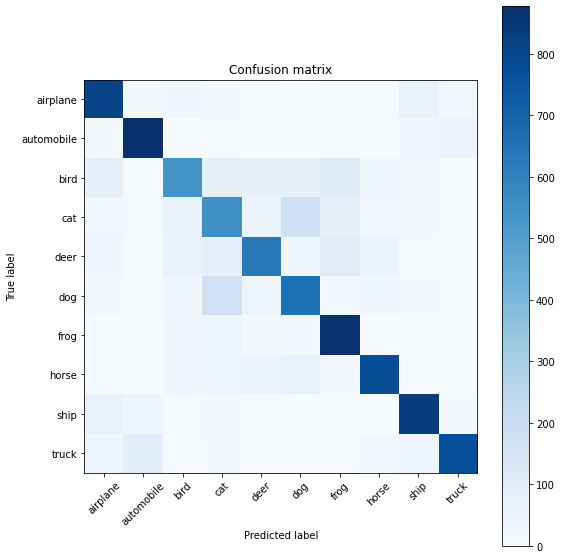

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1000
           1       0.83      0.88      0.85      1000
           2       0.68      0.54      0.60      1000
           3       0.54      0.55      0.55      1000
           4       0.72      0.63      0.67      1000
           5       0.62      0.66      0.64      1000
           6       0.72      0.87      0.79      1000
           7       0.81      0.78      0.80      1000
           8       0.81      0.84      0.82      1000
           9       0.86      0.77      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [ ]:
cm_visual(y_true, cnn_no_tl_pred, categories)

##### Transfer Learning CNN model

[[810  18  21   6  27   4  12  10  68  24]
 [ 22 809   5  10   7  10  17  13  35  72]
 [ 74  13 610  40  88  40 102  23   9   1]
 [ 26  23  51 493  69 147 105  38  17  31]
 [ 20   9  43  58 692  22  76  59  11  10]
 [ 10  11  50 145  58 596  53  53  12  12]
 [  7  13  35  39  56  42 792   1  12   3]
 [ 14  10  36  33  70  58  15 743   7  14]
 [ 67  36  10   7   9   5   8   6 827  25]
 [ 43  93   7  21   9  11   8  12  26 770]]


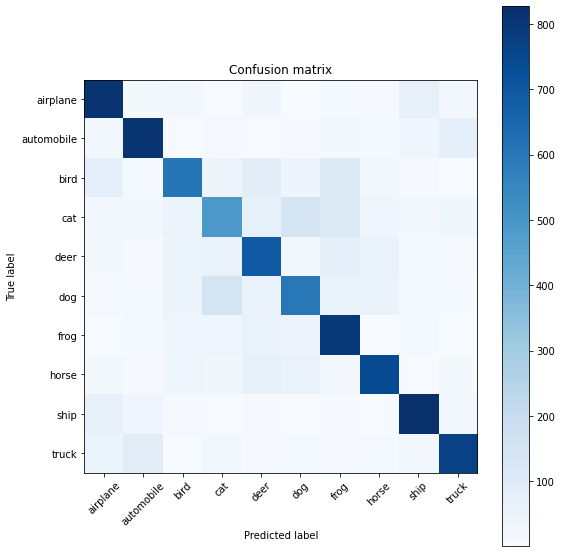

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1000
           1       0.78      0.81      0.80      1000
           2       0.70      0.61      0.65      1000
           3       0.58      0.49      0.53      1000
           4       0.64      0.69      0.66      1000
           5       0.64      0.60      0.62      1000
           6       0.67      0.79      0.72      1000
           7       0.78      0.74      0.76      1000
           8       0.81      0.83      0.82      1000
           9       0.80      0.77      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [ ]:
cm_visual(y_true, cnn_tl_pred, categories)

## Example Image Predictions


Image #3092
True Category: 5 - dog
NO Transfer Learning CNN Predicted Category: 5 - dog
Transfer Learning CNN Predicted Category: 5 - dog


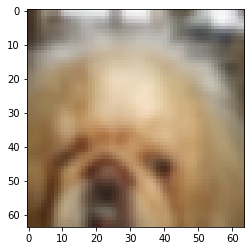


Image #5600
True Category: 6 - frog
NO Transfer Learning CNN Predicted Category: 6 - frog
Transfer Learning CNN Predicted Category: 6 - frog


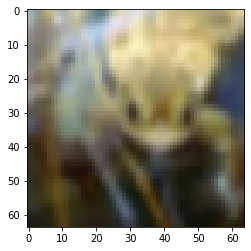


Image #5365
True Category: 8 - ship
NO Transfer Learning CNN Predicted Category: 8 - ship
Transfer Learning CNN Predicted Category: 1 - automobile


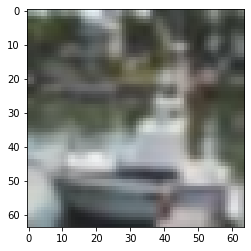


Image #2676
True Category: 4 - deer
NO Transfer Learning CNN Predicted Category: 6 - frog
Transfer Learning CNN Predicted Category: 3 - cat


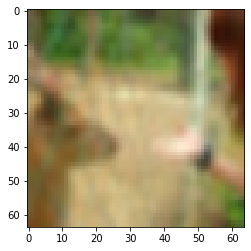


Image #5307
True Category: 1 - automobile
NO Transfer Learning CNN Predicted Category: 1 - automobile
Transfer Learning CNN Predicted Category: 1 - automobile


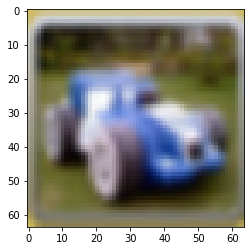

In [ ]:
for i in range(5):
    sample = random.randint(0, 9999)
    image = x_test[sample]

    plt.imshow(image)
     
    true_category_index = y_true[sample]
    cnn_no_tl_pred_category_index = cnn_no_tl_pred[sample]
    cnn_tl_pred_category_index = cnn_tl_pred[sample]
    print(f"\nImage #{sample}") 
    print(f"True Category: {true_category_index} - {categories[true_category_index]}")
    print(f"NO Transfer Learning CNN Predicted Category: {cnn_no_tl_pred_category_index} - {categories[cnn_no_tl_pred_category_index]}")
    print(f"Transfer Learning CNN Predicted Category: {cnn_tl_pred_category_index} - {categories[cnn_tl_pred_category_index]}")
    
    plt.show()